# EDA Thesis
Anna van der Zee (13107941)

My database consists of multiple tables, which I will look at separately. The most important ones for my thesis will be admissions.csv and drugitems.csv so I will focus on those. 
The database contains data from the clinical patient data management system of the department of Intensive Care, a mixed medical-surgical ICU, from Amsterdam University Medical Center. The clinical data contains 23,106 admissions of 20,109 patients admitted from 2003 to 2016 with a total of almost 1.0 billion clinical observations consisting of vitals, clinical scoring systems, device data and lab results data and nearly 5.0 million medication records.



Reference: Thoral, P. J., Peppink, J. M., Driessen, R. H., Sijbrands, E. J. G., Kompanje, E. J. O., Kaplan, L., Bailey, H., Kesecioglu, J., Cecconi, M., Churpek, M., Clermont, G., van der Schaar, M., Ercole, A., Girbes, A. R. J., Elbers, P. W. G., on behalf of the Amsterdam University Medical Centers Database (AmsterdamUMCdb) Collaborators and the SCCM/ESICM Joint Data Science Task Force (2021). Sharing ICU Patient Data Responsibly Under the Society of Critical Care Medicine/European Society of Intensive Care Medicine Joint Data Science Collaboration: The Amsterdam University Medical Centers Database (AmsterdamUMCdb) Example. Crit Care Med. 2021 Jun 1;49(6):e563-e577. doi: 10.1097/CCM.0000000000004916. PMID: 33625129; PMCID: PMC8132908.



**My research question:**  
To what extent can machine learning models predict ICU length of stay at Amsterdam UMC, and do these models demonstrate algorithmic fairness in their predictions across gender?

**Sub-questions:**
- How accurately can different machine learning models predict ICU length of stay at Amsterdam UMC, and which model performs best?
- What are the key factors that influence ICU length of stay predictions, and do they vary between different machine learning models?
- How do the different models perform across gender groups?
- Do the models exhibit fairness in their performance across gender groups?


In [3]:
import pandas as pd

df_adm = pd.read_csv("admissions.csv", encoding="ISO-8859-1")
print("Dataset Overview:")
print(df_adm.info())

print("\nMissing Values per Column:")
print(df_adm.isnull().sum())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23106 entries, 0 to 23105
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patientid           23106 non-null  int64  
 1   admissionid         23106 non-null  int64  
 2   admissioncount      23106 non-null  int64  
 3   location            23106 non-null  object 
 4   urgency             23106 non-null  int64  
 5   origin              9031 non-null   object 
 6   admittedat          23106 non-null  int64  
 7   admissionyeargroup  23106 non-null  object 
 8   dischargedat        23106 non-null  int64  
 9   lengthofstay        23106 non-null  int64  
 10  destination         22886 non-null  object 
 11  gender              22610 non-null  object 
 12  agegroup            23106 non-null  object 
 13  dateofdeath         7690 non-null   float64
 14  weightgroup         22160 non-null  object 
 15  weightsource        17378 non-null 

In [5]:
df_adm.head()

patientid  admissionid  admissioncount location  urgency  \
0          0            0               1       IC        0   
1          1            1               1       IC        0   
2          2            2               1       IC        1   
3          3            3               1       IC        0   
4          4            4               1    IC&MC        0   

                                   origin  admittedat admissionyeargroup  \
0                                     NaN           0          2003-2009   
1                                     NaN           0          2010-2016   
2  Eerste Hulp afdeling zelfde ziekenhuis           0          2010-2016   
3                                     NaN           0          2003-2009   
4      Verpleegafdeling zelfde ziekenhuis           0          2010-2016   

   dischargedat  lengthofstay destination gender agegroup  dateofdeath  \
0     148800000            42          16  Vrouw      80+          NaN   
1      96120000            26          15    Man    60-69          NaN   
2      84240000            23          15    Man    60-69          NaN   
3      84900000            23          14    Man    50-59          NaN   
4     180900000            50          19    Man    70-79          NaN   

  weightgroup  weightsource heightgroup  heightsource        specialty  
0       60-69  Anamnestisch     160-169  Anamnestisch  Cardiochirurgie  
1       70-79  Anamnestisch     170-179  Anamnestisch  Cardiochirurgie  
2       90-99  Anamnestisch     180-189  Anamnestisch  Cardiochirurgie  
3       90-99           NaN     180-189       Gemeten  Cardiochirurgie  
4       70-79  Anamnestisch     170-179  Anamnestisch  Cardiochirurgie

In [124]:
df.describe()

patientid   admissionid  admissioncount       urgency    admittedat  \
count  23106.000000  23106.000000    23106.000000  23106.000000  2.310600e+04   
mean   10161.070415  11769.031853        1.170389      0.270319  3.953681e+09   
std     5857.733809   6790.315322        0.503705      0.444134  2.386746e+10   
min        0.000000      0.000000        1.000000      0.000000  0.000000e+00   
25%     5101.500000   5886.500000        1.000000      0.000000  0.000000e+00   
50%    10156.500000  11765.500000        1.000000      0.000000  0.000000e+00   
75%    15237.000000  17647.750000        1.000000      1.000000  0.000000e+00   
max    20326.000000  23552.000000        8.000000      1.000000  3.916525e+11   

       dischargedat  lengthofstay   dateofdeath  
count  2.310600e+04  23106.000000  7.690000e+03  
mean   4.353618e+09    111.103956  6.106615e+10  
std    2.389428e+10    233.114984  8.798188e+10  
min    0.000000e+00      0.000000 -1.382944e+11  
25%    7.512000e+07     20.000000  1.037340e+09  
50%    1.122000e+08     26.000000  1.481682e+10  
75%    5.508750e+08     88.000000  9.100178e+10  
max    3.916687e+11   5697.000000  4.595904e+11

In [7]:
columns_to_keep = [
    'patientid',
    'admissionid',
    'location',
    'admissionyeargroup',
    'destination',
    'agegroup',
    'weightgroup',
    'heightgroup',
    'specialty',
    'los_days'
]

# Subset the DataFrame by selecting only the desired columns
df_filtered = df_adm[columns_to_keep]
df_filtered

KeyError: "['los_days'] not in index"

In [411]:
df_filtered = df_filtered[df_filtered['destination'] != 'Overleden']

In [415]:
df_filtered = df_filtered.drop(columns=['destination'])

In [417]:
print(df_filtered.info())
print("\nMissing Values per Column:")
print(df_filtered.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 18180 entries, 0 to 23105
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patientid           18180 non-null  int64  
 1   admissionid         18180 non-null  int64  
 2   location            18180 non-null  object 
 3   admissionyeargroup  18180 non-null  object 
 4   agegroup            18180 non-null  object 
 5   weightgroup         17634 non-null  object 
 6   heightgroup         17225 non-null  object 
 7   specialty           17194 non-null  object 
 8   los_days            18180 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 1.4+ MB
None

Missing Values per Column:
patientid               0
admissionid             0
location                0
admissionyeargroup      0
agegroup                0
weightgroup           546
heightgroup           955
specialty             986
los_days                0
dtype: int64


In [419]:
df_filtered[['los_days']].describe()

los_days
count  18180.000000
mean       3.826073
std        8.197924
min        0.000000
25%        0.833333
50%        1.000000
75%        2.791667
max      202.083333

In [435]:
df_filtered[df_filtered['los_days'] >= 0.5].shape[0]

17507

In [421]:
df_filtered.to_csv("admissions_filtered.csv", index=False)


## How many admissions per location?
IC is intensive care, MC is Medium Care. For my thesis I will focus on Intensive Care

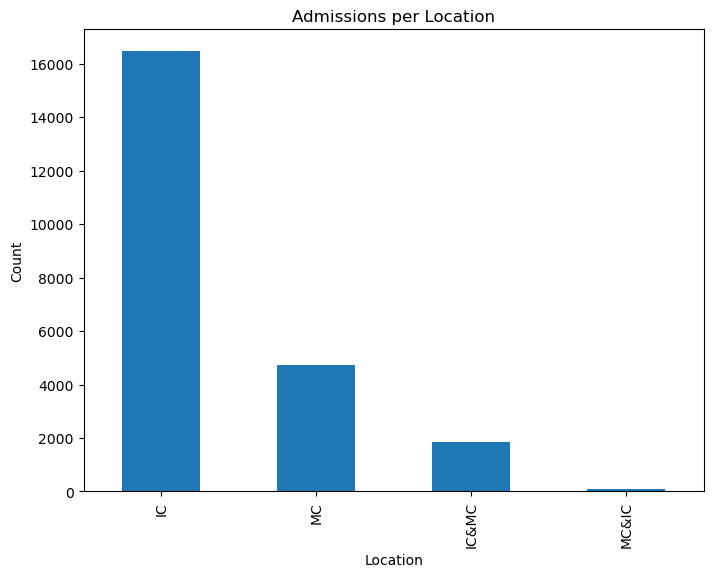

In [307]:

import matplotlib.pyplot as plt

location = df_adm['location'].value_counts()
plt.figure(figsize=(8, 6))
location.plot(kind='bar')

plt.title('Admissions per Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

In [369]:
df_adm.groupby('location')['los_days'].agg(['mean', 'median', 'count']).sort_values(by='median', ascending=False)

mean    median  count
location                            
IC&MC     13.435786  5.958333   1848
MC&IC      7.708829  5.479167     84
IC         4.413139  1.041667  16454
MC         1.880226  0.833333   4720

In [128]:
#focus on IC
df_ic = df[df['location'] == 'IC']

In [136]:
#how many times is someone admitted to the IC?
df_ic['admissioncount'].value_counts()

admissioncount
1    14691
2     1412
3      274
4       56
5       16
6        3
7        2
Name: count, dtype: int64

In [357]:
df_adm['admissioncount'].value_counts()

admissioncount
1    20109
2     2320
3      485
4      139
5       40
6        9
7        3
8        1
Name: count, dtype: int64

In [13]:
df_adm = df_adm[df_adm['admissioncount'] == 1]
df_adm

patientid  admissionid  admissioncount location  urgency  \
0              0            0               1       IC        0   
1              1            1               1       IC        0   
2              2            2               1       IC        1   
3              3            3               1       IC        0   
4              4            4               1    IC&MC        0   
...          ...          ...             ...      ...      ...   
23101      20322        23548               1    IC&MC        1   
23102      20323        23549               1       MC        0   
23103      20324        23550               1       IC        1   
23104      20325        23551               1       IC        1   
23105      20326        23552               1       MC        1   

                                       origin  admittedat admissionyeargroup  \
0                                         NaN           0          2003-2009   
1                                         NaN           0          2010-2016   
2      Eerste Hulp afdeling zelfde ziekenhuis           0          2010-2016   
3                                         NaN           0          2003-2009   
4          Verpleegafdeling zelfde ziekenhuis           0          2010-2016   
...                                       ...         ...                ...   
23101                                     NaN           0          2010-2016   
23102      Verpleegafdeling zelfde ziekenhuis           0          2010-2016   
23103  Eerste Hulp afdeling zelfde ziekenhuis           0          2010-2016   
23104                                     NaN           0          2003-2009   
23105      Verpleegafdeling zelfde ziekenhuis           0          2010-2016   

       dischargedat  lengthofstay destination gender agegroup  dateofdeath  \
0         148800000            42          16  Vrouw      80+          NaN   
1          96120000            26          15    Man    60-69          NaN   
2          84240000            23          15    Man    60-69          NaN   
3          84900000            23          14    Man    50-59          NaN   
4         180900000            50          19    Man    70-79          NaN   
...             ...           ...         ...    ...      ...          ...   
23101     949380000           264          45  Vrouw    40-49          NaN   
23102      56820000            16          41  Vrouw    40-49          NaN   
23103      69720000            20   Overleden    Man      80+  -35640000.0   
23104     165660000            46   Overleden  Vrouw    40-49  115500000.0   
23105      73320000            20          33    Man    60-69  978780000.0   

      weightgroup  weightsource heightgroup  heightsource        specialty  \
0           60-69  Anamnestisch     160-169  Anamnestisch  Cardiochirurgie   
1           70-79  Anamnestisch     170-179  Anamnestisch  Cardiochirurgie   
2           90-99  Anamnestisch     180-189  Anamnestisch  Cardiochirurgie   
3           90-99           NaN     180-189       Gemeten  Cardiochirurgie   
4           70-79  Anamnestisch     170-179  Anamnestisch  Cardiochirurgie   
...           ...           ...         ...           ...              ...   
23101       70-79  Anamnestisch     180-189  Anamnestisch   Neurochirurgie   
23102       60-69  Anamnestisch     160-169  Anamnestisch       Nefrologie   
23103         59-       Geschat     170-179       Geschat         Inwendig   
23104       60-69       Geschat     160-169       Geschat   Neurochirurgie   
23105       60-69  Anamnestisch     180-189  Anamnestisch   Neurochirurgie   

        los_days  
0       1.750000  
1       1.083333  
2       0.958333  
3       0.958333  
4       2.083333  
...          ...  
23101  11.000000  
23102   0.666667  
23103   0.833333  
23104   1.916667  
23105   0.833333  

[20109 rows x 20 columns]

## Length Of Stay

In [279]:
df_adm['lengthofstay'].value_counts().sort_index()[:30]

lengthofstay
0       20
1       45
2       49
3       50
4       60
5       77
6       90
7      102
8      108
9      147
10     151
11     176
12     220
13     228
14     304
15     332
16     511
17     533
18     794
19    1029
20    1038
21    1003
22    1123
23    1438
24    1225
25     648
26     354
27     256
28     198
29     127
Name: count, dtype: int64

In [9]:
df_adm['los_days'] = df_adm['lengthofstay'] / 24

In [19]:
df_adm = df_adm[df_adm['destination'] != 'Overleden']

In [21]:
df_adm[df_adm['los_days'] > 0.25]

patientid  admissionid  admissioncount location  urgency  \
0              0            0               1       IC        0   
1              1            1               1       IC        0   
2              2            2               1       IC        1   
3              3            3               1       IC        0   
4              4            4               1    IC&MC        0   
...          ...          ...             ...      ...      ...   
23098      20319        23545               1       MC        1   
23099      20320        23546               1       IC        1   
23101      20322        23548               1    IC&MC        1   
23102      20323        23549               1       MC        0   
23105      20326        23552               1       MC        1   

                                       origin  admittedat admissionyeargroup  \
0                                         NaN           0          2003-2009   
1                                         NaN           0          2010-2016   
2      Eerste Hulp afdeling zelfde ziekenhuis           0          2010-2016   
3                                         NaN           0          2003-2009   
4          Verpleegafdeling zelfde ziekenhuis           0          2010-2016   
...                                       ...         ...                ...   
23098                                     NaN           0          2010-2016   
23099  Eerste Hulp afdeling zelfde ziekenhuis           0          2010-2016   
23101                                     NaN           0          2010-2016   
23102      Verpleegafdeling zelfde ziekenhuis           0          2010-2016   
23105      Verpleegafdeling zelfde ziekenhuis           0          2010-2016   

       dischargedat  lengthofstay destination gender agegroup  dateofdeath  \
0         148800000            42          16  Vrouw      80+          NaN   
1          96120000            26          15    Man    60-69          NaN   
2          84240000            23          15    Man    60-69          NaN   
3          84900000            23          14    Man    50-59          NaN   
4         180900000            50          19    Man    70-79          NaN   
...             ...           ...         ...    ...      ...          ...   
23098     472500000           131          40    Man    18-39          NaN   
23099     351900000            98           4    Man    60-69  725460000.0   
23101     949380000           264          45  Vrouw    40-49          NaN   
23102      56820000            16          41  Vrouw    40-49          NaN   
23105      73320000            20          33    Man    60-69  978780000.0   

      weightgroup  weightsource heightgroup  heightsource        specialty  \
0           60-69  Anamnestisch     160-169  Anamnestisch  Cardiochirurgie   
1           70-79  Anamnestisch     170-179  Anamnestisch  Cardiochirurgie   
2           90-99  Anamnestisch     180-189  Anamnestisch  Cardiochirurgie   
3           90-99           NaN     180-189       Gemeten  Cardiochirurgie   
4           70-79  Anamnestisch     170-179  Anamnestisch  Cardiochirurgie   
...           ...           ...         ...           ...              ...   
23098       60-69       Geschat     160-169       Geschat    Traumatologie   
23099       80-89       Geschat        190+       Geschat      Cardiologie   
23101       70-79  Anamnestisch     180-189  Anamnestisch   Neurochirurgie   
23102       60-69  Anamnestisch     160-169  Anamnestisch       Nefrologie   
23105       60-69  Anamnestisch     180-189  Anamnestisch   Neurochirurgie   

        los_days  
0       1.750000  
1       1.083333  
2       0.958333  
3       0.958333  
4       2.083333  
...          ...  
23098   5.458333  
23099   4.083333  
23101  11.000000  
23102   0.666667  
23105   0.833333  

[17975 rows x 20 columns]

In [289]:
df_adm['los_days'].value_counts().sort_index()

los_days
0.000000      20
0.041667      45
0.083333      49
0.125000      50
0.166667      60
              ..
160.625000     1
182.500000     1
202.083333     1
209.125000     1
237.375000     1
Name: count, Length: 1169, dtype: int64

In [285]:
df_adm[df_adm['los_days'] > 1]

patientid  admissionid  admissioncount location  urgency  \
0              0            0               1       IC        0   
1              1            1               1       IC        0   
4              4            4               1    IC&MC        0   
5              5            5               1       IC        1   
6              6            6               1       IC        1   
...          ...          ...             ...      ...      ...   
23098      20319        23545               1       MC        1   
23099      20320        23546               1       IC        1   
23100      20321        23547               1       IC        1   
23101      20322        23548               1    IC&MC        1   
23104      20325        23551               1       IC        1   

                                       origin  admittedat admissionyeargroup  \
0                                         NaN           0          2003-2009   
1                                         NaN           0          2010-2016   
4          Verpleegafdeling zelfde ziekenhuis           0          2010-2016   
5      Eerste Hulp afdeling zelfde ziekenhuis           0          2010-2016   
6           Verpleegafdeling ander ziekenhuis           0          2010-2016   
...                                       ...         ...                ...   
23098                                     NaN           0          2010-2016   
23099  Eerste Hulp afdeling zelfde ziekenhuis           0          2010-2016   
23100                                     NaN           0          2003-2009   
23101                                     NaN           0          2010-2016   
23104                                     NaN           0          2003-2009   

       dischargedat  lengthofstay destination gender agegroup  dateofdeath  \
0         148800000            42          16  Vrouw      80+          NaN   
1          96120000            26          15    Man    60-69          NaN   
4         180900000            50          19    Man    70-79          NaN   
5         246420000            69          31    Man    50-59          NaN   
6         173460000            48          45  Vrouw      80+          NaN   
...             ...           ...         ...    ...      ...          ...   
23098     472500000           131          40    Man    18-39          NaN   
23099     351900000            98           4    Man    60-69  725460000.0   
23100     267780000            75   Overleden  Vrouw    70-79  202980000.0   
23101     949380000           264          45  Vrouw    40-49          NaN   
23104     165660000            46   Overleden  Vrouw    40-49  115500000.0   

      weightgroup  weightsource heightgroup  heightsource        specialty  \
0           60-69  Anamnestisch     160-169  Anamnestisch  Cardiochirurgie   
1           70-79  Anamnestisch     170-179  Anamnestisch  Cardiochirurgie   
4           70-79  Anamnestisch     170-179  Anamnestisch  Cardiochirurgie   
5           60-69       Geschat     160-169       Gemeten       Longziekte   
6           70-79       Geschat     160-169       Geschat   Neurochirurgie   
...           ...           ...         ...           ...              ...   
23098       60-69       Geschat     160-169       Geschat    Traumatologie   
23099       80-89       Geschat        190+       Geschat      Cardiologie   
23100       80-89       Gemeten     160-169       Gemeten      Cardiologie   
23101       70-79  Anamnestisch     180-189  Anamnestisch   Neurochirurgie   
23104       60-69       Geschat     160-169       Geschat   Neurochirurgie   

        los_days  
0       1.750000  
1       1.083333  
4       2.083333  
5       2.875000  
6       2.000000  
...          ...  
23098   5.458333  
23099   4.083333  
23100   3.125000  
23101  11.000000  
23104   1.916667  

[12253 rows x 20 columns]

In [287]:
df_adm[['los_days']].describe()

los_days
count  23106.000000
mean       4.629331
std        9.713124
min        0.000000
25%        0.833333
50%        1.083333
75%        3.666667
max      237.375000

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define bins: 1-day intervals up to 7, then a final 7+ bin
bins = [0, 1, 2, 3, 4, 5, 6, 7, np.inf]
labels = ['0–1', '1–2', '2–3', '3–4', '4–5', '5–6', '6–7', '7+']

# Bin the length of stay
df_adm['los_binned'] = pd.cut(df_adm['los_days'], bins=bins, labels=labels, right=False)

# Plot the count of each bin
plt.figure(figsize=(10, 6))
sns.countplot(data=df_adm, x='los_binned', order=labels)

plt.xlabel("Length of Stay (days)")
plt.ylabel("Number of Admissions")
plt.title("Length of Stay Distribution")
plt.tight_layout()
plt.savefig("los2.png", dpi=300, bbox_inches='tight')

plt.show()


C:\Users\Anna\AppData\Local\Temp\ipykernel_11204\396014521.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adm['los_binned'] = pd.cut(df_adm['los_days'], bins=bins, labels=labels, right=False)


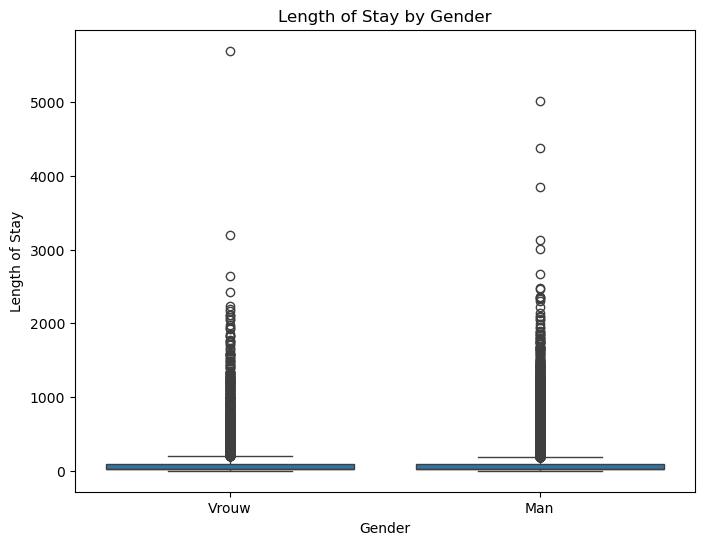

In [187]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='lengthofstay', data=df)
plt.title('Length of Stay by Gender')
plt.xlabel('Gender')
plt.ylabel('Length of Stay')
plt.show()


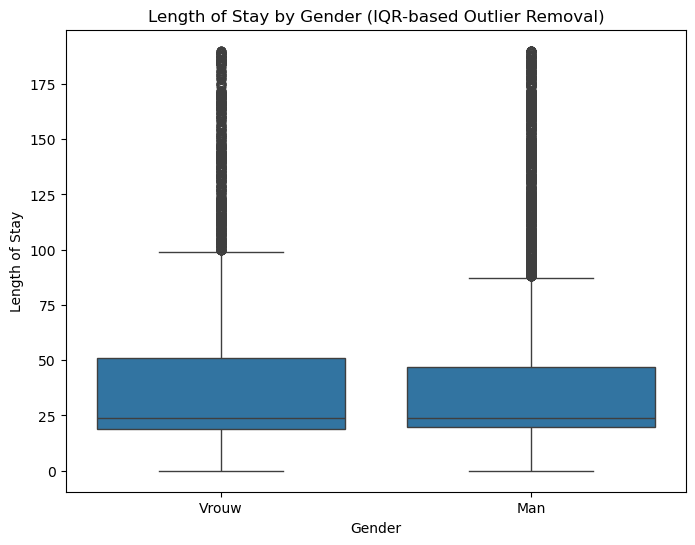

In [189]:
Q1 = df['lengthofstay'].quantile(0.25)
Q3 = df['lengthofstay'].quantile(0.75)
IQR = Q3 - Q1

lower_cutoff = Q1 - 1.5 * IQR
upper_cutoff = Q3 + 1.5 * IQR

df_filtered_iqr = df[(df['lengthofstay'] >= lower_cutoff) & (df['lengthofstay'] <= upper_cutoff)]

plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='lengthofstay', data=df_filtered_iqr)
plt.title('Length of Stay by Gender (IQR-based Outlier Removal)')
plt.xlabel('Gender')
plt.ylabel('Length of Stay')
plt.show()


## Urgency

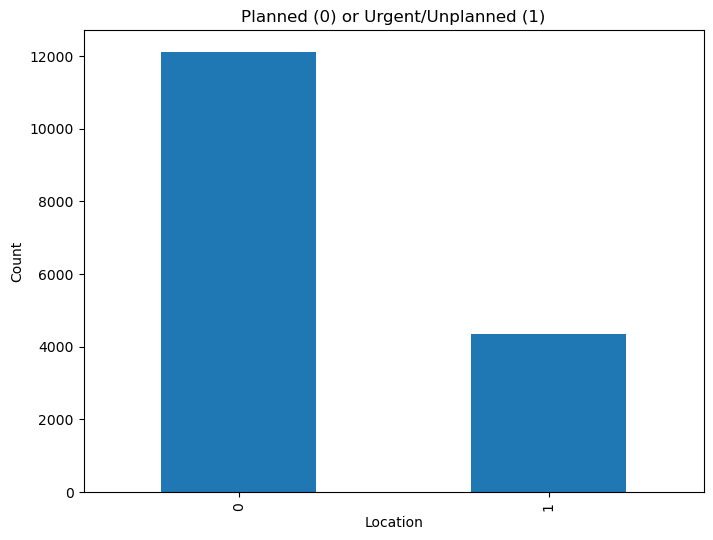

In [130]:
import matplotlib.pyplot as plt

location = df_ic['urgency'].value_counts()
plt.figure(figsize=(8, 6))
location.plot(kind='bar')

plt.title('Planned (0) or Urgent/Unplanned (1)')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

In [367]:
df_adm.groupby('urgency')['los_days'].agg(['mean', 'median', 'count'])

mean    median  count
urgency                           
0        4.149160  1.000000  16860
1        5.925472  2.291667   6246

## Origin

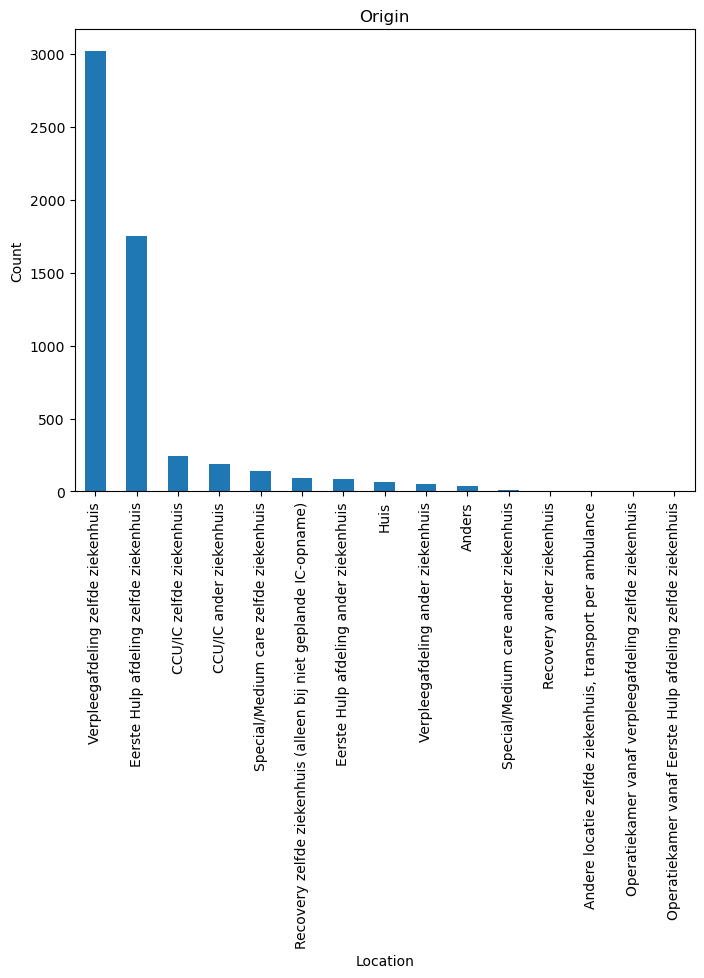

In [65]:
import matplotlib.pyplot as plt

location = df_ic['origin'].value_counts()
plt.figure(figsize=(8, 6))
location.plot(kind='bar')

plt.title('Origin')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

## Destination
Department the patient has been discharged to or 'Overleden' if the patient died during the ICU/MCU admission


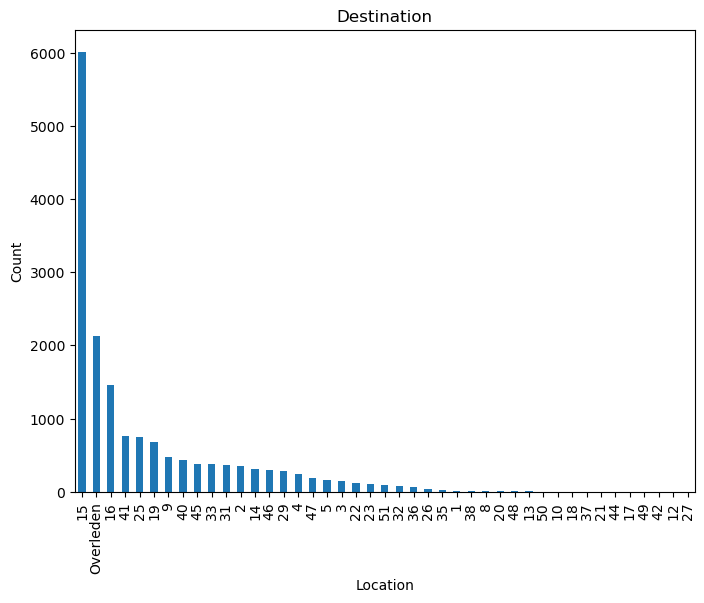

In [67]:
import matplotlib.pyplot as plt

location = df_ic['destination'].value_counts()
plt.figure(figsize=(8, 6))
location.plot(kind='bar')

plt.title('Destination')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

In [69]:
# How many people died?
df_ic.loc[df['destination'] == 'Overleden', 'admissionid'].count()

2130

## Which year group?

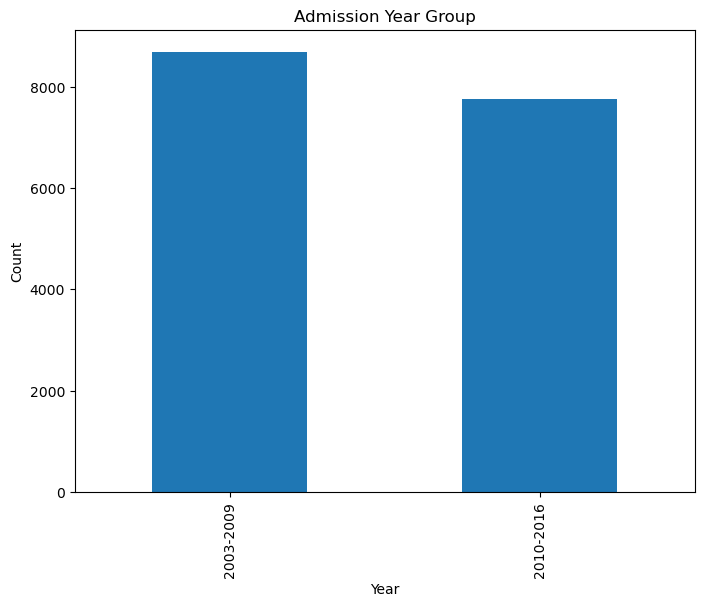

In [73]:
location = df_ic['admissionyeargroup'].value_counts()
plt.figure(figsize=(8, 6))
location.plot(kind='bar')

plt.title('Admission Year Group')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

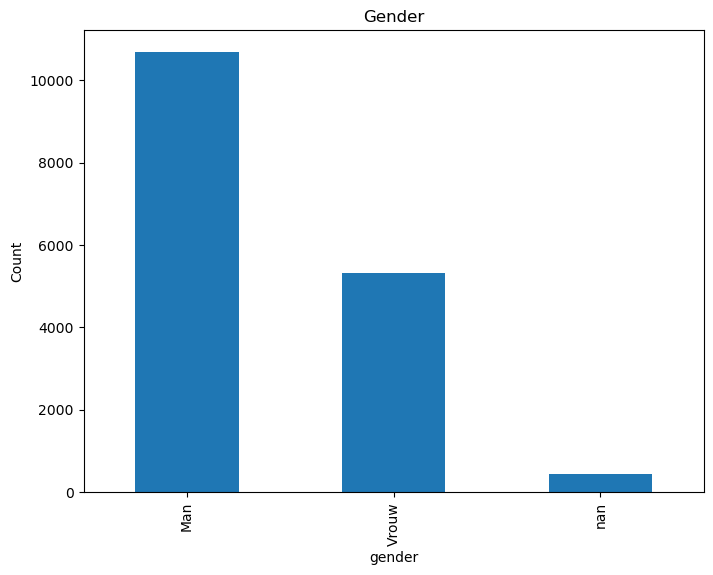

In [82]:
location = df_ic['gender'].value_counts(dropna=False)

plt.figure(figsize=(8, 6))
location.plot(kind='bar')

plt.title('Gender')
plt.ylabel('Count')
plt.show()

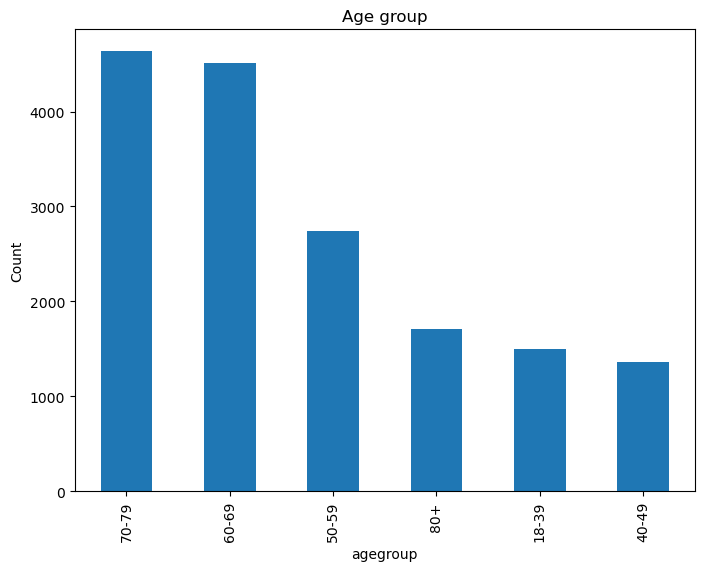

In [86]:
location = df_ic['agegroup'].value_counts(dropna=False)

plt.figure(figsize=(8, 6))
location.plot(kind='bar')

plt.title('Age group')
plt.ylabel('Count')
plt.show()

In [100]:
df_died = df_ic[df_ic['destination'] == 'Overleden']

# Count the number of deaths per age group
age_deaths = df_died['agegroup'].value_counts(dropna=False).reset_index()
age_deaths.columns = ['agegroup', 'Number of Deaths']
age_deaths

agegroup  Number of Deaths
0    70-79               602
1    60-69               515
2      80+               394
3    50-59               310
4    40-49               162
5    18-39               147

In [104]:
df_ic['specialty'].value_counts()

specialty
Cardiochirurgie                 6723
Cardiologie                     1209
Intensive Care Volwassenen      1051
Neurochirurgie                   885
Inwendig                         815
Heelkunde Gastro-enterologie     791
Vaatchirurgie                    790
Traumatologie                    631
Neurologie                       497
Longziekte                       343
Keel, Neus & Oorarts             275
Heelkunde Oncologie              230
Heelkunde Longen/Oncologie       229
Hematologie                      217
Nefrologie                       135
Orthopedie                       129
Gynaecologie                     128
Urologie                         115
Maag-,Darm-,Leverziekten         106
Oncologie Inwendig                50
ders                              47
Mondheelkunde                     16
Obstetrie                         14
Verloskunde                       14
Plastische chirurgie              14
Oogheelkunde                       3
Reumatologie                

In [299]:
df_adm.groupby('specialty')['urgency'].value_counts().unstack()

urgency                            0      1
specialty                                  
Cardiochirurgie               7092.0  325.0
Cardiologie                    419.0  912.0
Gynaecologie                   161.0   19.0
Heelkunde Gastro-enterologie   914.0  291.0
Heelkunde Longen/Oncologie     366.0   29.0
Heelkunde Oncologie            467.0   30.0
Hematologie                    220.0   29.0
Intensive Care Volwassenen     609.0  535.0
Inwendig                       520.0  844.0
Keel, Neus & Oorarts           251.0  125.0
Longziekte                     267.0  215.0
Maag-,Darm-,Leverziekten       121.0   68.0
Mondheelkunde                   11.0    9.0
Nefrologie                     295.0   94.0
Neurochirurgie                1754.0  773.0
Neurologie                     300.0  486.0
Obstetrie                       11.0    4.0
Oncologie Inwendig              78.0    6.0
Oogheelkunde                     5.0    NaN
Orthopedie                     179.0   25.0
Plastische chirurgie            31.0    9.0
Reumatologie                     3.0    1.0
Traumatologie                  224.0  939.0
Urologie                       180.0   36.0
Vaatchirurgie                 1092.0  351.0
Verloskunde                     12.0    4.0
ders                            29.0   35.0

In [297]:
df_adm.groupby('specialty')['los_days'].agg(['mean', 'median'])

mean    median
specialty                                        
Cardiochirurgie                2.490141  0.958333
Cardiologie                    7.365327  4.041667
Gynaecologie                   3.090741  1.000000
Heelkunde Gastro-enterologie   7.081432  2.083333
Heelkunde Longen/Oncologie     5.515084  1.083333
Heelkunde Oncologie            3.731472  1.000000
Hematologie                   11.319444  5.916667
Intensive Care Volwassenen     8.191361  3.083333
Inwendig                       5.977884  1.958333
Keel, Neus & Oorarts           4.924091  2.250000
Longziekte                     6.169174  2.375000
Maag-,Darm-,Leverziekten       7.631173  2.666667
Mondheelkunde                 10.016667  3.375000
Nefrologie                     4.475578  0.916667
Neurochirurgie                 4.135800  0.875000
Neurologie                     5.762405  2.000000
Obstetrie                      1.741667  1.000000
Oncologie Inwendig             5.635913  1.958333
Oogheelkunde                   1.183333  1.000000
Orthopedie                     2.486315  1.041667
Plastische chirurgie           6.350000  1.437500
Reumatologie                  16.020833  2.229167
Traumatologie                  6.100064  2.000000
Urologie                       4.530093  1.520833
Vaatchirurgie                  5.146223  1.083333
Verloskunde                    3.893229  0.958333
ders                           4.529297  1.395833

## Next dataset, drugitems.csv
Contains medication orders including fluids, (parenteral) feeding and blood transfusions during the stay on the ICU, has 4907269 rows!


In [1]:
import pandas as pd
df = pd.read_csv("drugitems.csv", encoding="ISO-8859-1")
print("Dataset Overview:")
print(df.info())

print("\nMissing Values per Column:")
print(df.isnull().sum())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4907269 entries, 0 to 4907268
Data columns (total 31 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   admissionid               int64  
 1   orderid                   int64  
 2   ordercategoryid           int64  
 3   ordercategory             object 
 4   itemid                    int64  
 5   item                      object 
 6   isadditive                int64  
 7   isconditional             int64  
 8   rate                      float64
 9   rateunit                  object 
 10  rateunitid                float64
 11  ratetimeunitid            float64
 12  doserateperkg             int64  
 13  dose                      float64
 14  doseunit                  object 
 15  doserateunit              object 
 16  doseunitid                int64  
 17  doserateunitid            float64
 18  administered              float64
 19  administeredunit          object 
 20  admini

In [192]:
df.head()

admissionid  orderid  ordercategoryid                      ordercategory  \
0            0  1994485               15  Injecties Antimicrobiele middelen   
1            0  1995066               15  Injecties Antimicrobiele middelen   
2            0  1995793               15  Injecties Antimicrobiele middelen   
3            0  1994602               17                   Infuus - Colloid   
4            0  1994826               17                   Infuus - Colloid   

   itemid                 item  isadditive  isconditional  rate rateunit  ...  \
0    9152  Cefazoline (Kefzol)           0              0   0.0      NaN  ...   
1    9152  Cefazoline (Kefzol)           0              0   0.0      NaN  ...   
2    9152  Cefazoline (Kefzol)           0              0   0.0      NaN  ...   
3    7252           Gelofusine           0              0   NaN      NaN  ...   
4    7252           Gelofusine           0              0   NaN      NaN  ...   

              action     start      stop  duration solutionitemid  \
0  Nieuwe toediening  20100000  20160000         1         8987.0   
1  Nieuwe toediening  52500000  52560000         1         8987.0   
2  Nieuwe toediening  84900000  84960000         1         8987.0   
3         Nieuwe zak  30540000  34140000        60            NaN   
4         Nieuwe zak  45780000  49380000        60            NaN   

          solutionitem  solutionadministered  solutionadministeredunit  \
0  NaCl 0,9% Medicatie                   0.0                        ml   
1  NaCl 0,9% Medicatie                   0.0                        ml   
2  NaCl 0,9% Medicatie                   0.0                        ml   
3                  NaN                   NaN                       NaN   
4                  NaN                   NaN                       NaN   

   fluidin iscontinuous  
0      0.0            0  
1      0.0            0  
2      0.0            0  
3    500.0            0  
4    500.0            0  

[5 rows x 31 columns]

In [193]:
admission_counts = df.groupby('admissionid').size()

print(admission_counts.describe())


count    22999.000000
mean       213.368799
std        457.554003
min          1.000000
25%         31.000000
50%         49.000000
75%        162.500000
max      10380.000000
dtype: float64


In [219]:
medication_orders = (
    df.groupby('admissionid')['orderid']
      .count()
      .reset_index(name='Number of Medication orders')
)
    
medication_orders

admissionid  Number of Medication orders
0                0                           62
1                1                           46
2                2                           57
3                3                           27
4                4                           81
...            ...                          ...
22994        23548                          719
22995        23549                           47
22996        23550                            6
22997        23551                           52
22998        23552                           19

[22999 rows x 2 columns]

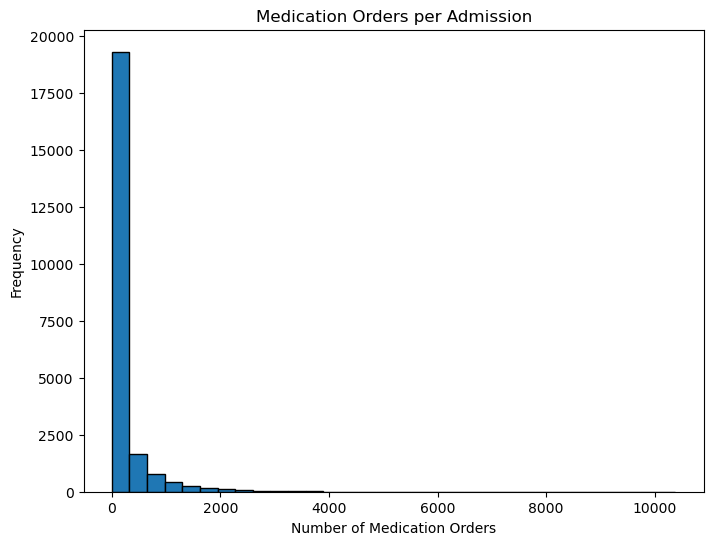

In [225]:
df_counts = (
    df
    .groupby('admissionid')['orderid']
    .count()
    .reset_index(name='medication orders per admission')
)

data = df_counts['medication orders per admission']

# 3. Create a histogram with 32 bins
plt.figure(figsize=(8, 6))
plt.hist(data, bins=32, edgecolor='black')
plt.title('Medication Orders per Admission')
plt.xlabel('Number of Medication Orders')
plt.ylabel('Frequency')
plt.show()


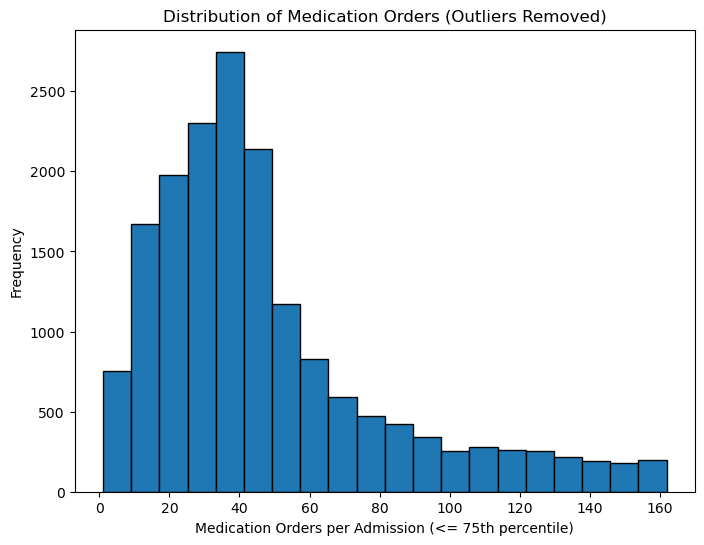

In [231]:
# plot with upper quartile removed 
df_counts = (
    df
    .groupby('admissionid')['orderid']
    .count()
    .reset_index(name='medication_orders_per_admission')
)

q3 = df_counts['medication_orders_per_admission'].quantile(0.75)

df_no_outliers = df_counts[df_counts['medication_orders_per_admission'] <= q3]

plt.figure(figsize=(8, 6))
plt.hist(df_no_outliers['medication_orders_per_admission'], bins=20, edgecolor='black')
plt.xlabel("Medication Orders per Admission (<= 75th percentile)")
plt.ylabel("Frequency")
plt.title("Distribution of Medication Orders (Outliers Removed)")
plt.show()


In [213]:
df['item'].value_counts()

item
Noradrenaline (Norepinefrine)    261507
SDD drank (4 x dgs)              196878
SDD pasta (4 x dgs)              196389
Paracetamol                      195992
NaCL 0,9% spuit                  166829
                                  ...  
Emtricitabine (Emtriva)               1
Pancuronium (Pavulon)                 1
Bouilllon 150ml                       1
Atracurium (Tracrium)                 1
Dopexamine (Dopacard)                 1
Name: count, Length: 1117, dtype: int64

For predicting ICU length of stay, I only want to look at the first 24 hours.

In [233]:
df['start_hours'] = df['start'] / 3.6e6
df['stop_hours'] = df['stop'] / 3.6e6
df

admissionid  orderid  ordercategoryid  \
0                  0  1994485               15   
1                  0  1995066               15   
2                  0  1995793               15   
3                  0  1994602               17   
4                  0  1994826               17   
...              ...      ...              ...   
4907264        23552  6291603               56   
4907265        23552  6291602               56   
4907266        23552  6290825               69   
4907267        23552  6291591               69   
4907268        23552  6291592               69   

                             ordercategory  itemid  \
0        Injecties Antimicrobiele middelen    9152   
1        Injecties Antimicrobiele middelen    9152   
2        Injecties Antimicrobiele middelen    9152   
3                         Infuus - Colloid    7252   
4                         Infuus - Colloid    7252   
...                                    ...     ...   
4907264               Voeding Vast voedsel   14972   
4907265               Voeding Vast voedsel   14982   
4907266     Niet iv Zalven/Crèmes/Druppels   12947   
4907267     Niet iv Zalven/Crèmes/Druppels   12947   
4907268     Niet iv Zalven/Crèmes/Druppels   19215   

                                            item  isadditive  isconditional  \
0                            Cefazoline (Kefzol)           0              0   
1                            Cefazoline (Kefzol)           0              0   
2                            Cefazoline (Kefzol)           0              0   
3                                     Gelofusine           0              0   
4                                     Gelofusine           0              0   
...                                          ...         ...            ...   
4907264      1/2 cupje margarine (10g)/roomboter           0              0   
4907265                              1 plak kaas           0              0   
4907266              Mupirocine (Bactroban) zalf           0              0   
4907267              Mupirocine (Bactroban) zalf           0              0   
4907268  Chloorhexidine-oplossing 4% (Hibiscrub)           0              0   

         rate rateunit  ...      stop  duration  solutionitemid  \
0         0.0      NaN  ...  20160000         1          8987.0   
1         0.0      NaN  ...  52560000         1          8987.0   
2         0.0      NaN  ...  84960000         1          8987.0   
3         NaN      NaN  ...  34140000        60             NaN   
4         NaN      NaN  ...  49380000        60             NaN   
...       ...      ...  ...       ...       ...             ...   
4907264   NaN      NaN  ...  68280000         1             NaN   
4907265   NaN      NaN  ...  68280000         1             NaN   
4907266   NaN      NaN  ...  15360000         1             NaN   
4907267   NaN      NaN  ...  57240000         1             NaN   
4907268   NaN      NaN  ...  57240000         1             NaN   

                solutionitem solutionadministered solutionadministeredunit  \
0        NaCl 0,9% Medicatie                  0.0                       ml   
1        NaCl 0,9% Medicatie                  0.0                       ml   
2        NaCl 0,9% Medicatie                  0.0                       ml   
3                        NaN                  NaN                      NaN   
4                        NaN                  NaN                      NaN   
...                      ...                  ...                      ...   
4907264                  NaN                  NaN                      NaN   
4907265                  NaN                  NaN                      NaN   
4907266                  NaN                  NaN                      NaN   
4907267                  NaN                  NaN                      NaN   
4907268                  NaN                  NaN                      NaN   

         fluidin  iscontinuous  start_hours stop_hours  
0          

In [240]:
#create a dataframe with only things happening within 24 hours after admission. 
df_24h = df[(df['start_hours'] <= 24) & (df['stop_hours'] <= 24)]
df_24h

admissionid  orderid  ordercategoryid  \
0                  0  1994485               15   
1                  0  1995066               15   
2                  0  1995793               15   
3                  0  1994602               17   
4                  0  1994826               17   
...              ...      ...              ...   
4907264        23552  6291603               56   
4907265        23552  6291602               56   
4907266        23552  6290825               69   
4907267        23552  6291591               69   
4907268        23552  6291592               69   

                             ordercategory  itemid  \
0        Injecties Antimicrobiele middelen    9152   
1        Injecties Antimicrobiele middelen    9152   
2        Injecties Antimicrobiele middelen    9152   
3                         Infuus - Colloid    7252   
4                         Infuus - Colloid    7252   
...                                    ...     ...   
4907264               Voeding Vast voedsel   14972   
4907265               Voeding Vast voedsel   14982   
4907266     Niet iv Zalven/Crèmes/Druppels   12947   
4907267     Niet iv Zalven/Crèmes/Druppels   12947   
4907268     Niet iv Zalven/Crèmes/Druppels   19215   

                                            item  isadditive  isconditional  \
0                            Cefazoline (Kefzol)           0              0   
1                            Cefazoline (Kefzol)           0              0   
2                            Cefazoline (Kefzol)           0              0   
3                                     Gelofusine           0              0   
4                                     Gelofusine           0              0   
...                                          ...         ...            ...   
4907264      1/2 cupje margarine (10g)/roomboter           0              0   
4907265                              1 plak kaas           0              0   
4907266              Mupirocine (Bactroban) zalf           0              0   
4907267              Mupirocine (Bactroban) zalf           0              0   
4907268  Chloorhexidine-oplossing 4% (Hibiscrub)           0              0   

         rate rateunit  ...      stop  duration  solutionitemid  \
0         0.0      NaN  ...  20160000         1          8987.0   
1         0.0      NaN  ...  52560000         1          8987.0   
2         0.0      NaN  ...  84960000         1          8987.0   
3         NaN      NaN  ...  34140000        60             NaN   
4         NaN      NaN  ...  49380000        60             NaN   
...       ...      ...  ...       ...       ...             ...   
4907264   NaN      NaN  ...  68280000         1             NaN   
4907265   NaN      NaN  ...  68280000         1             NaN   
4907266   NaN      NaN  ...  15360000         1             NaN   
4907267   NaN      NaN  ...  57240000         1             NaN   
4907268   NaN      NaN  ...  57240000         1             NaN   

                solutionitem solutionadministered solutionadministeredunit  \
0        NaCl 0,9% Medicatie                  0.0                       ml   
1        NaCl 0,9% Medicatie                  0.0                       ml   
2        NaCl 0,9% Medicatie                  0.0                       ml   
3                        NaN                  NaN                      NaN   
4                        NaN                  NaN                      NaN   
...                      ...                  ...                      ...   
4907264                  NaN                  NaN                      NaN   
4907265                  NaN                  NaN                      NaN   
4907266                  NaN                  NaN                      NaN   
4907267                  NaN                  NaN                      NaN   
4907268                  NaN                  NaN                      NaN   

         fluidin  iscontinuous  start_hours stop_hours  
0          

In [311]:
df_24h['ordercategory'].value_counts()

ordercategory
2. Spuitpompen                            308774
Infuus - Crystalloid                      152217
Injecties Antimicrobiele middelen          52436
Injecties CZS/Sedatie/Analgetica           45105
Niet iv CZS/Sedatie/Analgetica             33814
Injecties Hormonen/Vitaminen/Mineralen     27261
Niet iv Antimicrobiele middelen            26172
Voeding Drinken                            24169
Infuus - Colloid                           22662
Infuus - Bloedproducten                    13715
Niet iv Zalven/Crèmes/Druppels             13237
Niet iv Circulatie/Diurese                 12393
Injecties Haematologisch                   11075
Voeding Vast voedsel                        8339
Niet iv Tractus Respiratorius               8332
Injecties Tractus Digestivus                6739
Niet iv Overig                              6307
Niet iv Tractus Digestivus                  6263
Niet iv Hormonen/Vitaminen/Mineralen        3667
Injecties Circulatie/Diuretica              3346
Niet I

In [315]:
df_24h['item'].value_counts()[:30]

item
Noradrenaline (Norepinefrine)          55354
Propofol (Diprivan)                    52812
NaCl 0,45%/Glucose 2,5%                50890
NaCL 0,9% spuit                        47417
Paracetamol                            37747
Morfine                                28004
NaCl 0,9 %                             26169
Cefazoline (Kefzol)                    22633
Gelofusine                             21482
Dopamine (Inotropin)                   21480
Actrapid (Insuline)                    21182
Kaliumchloride (KCL)                   19133
Ri-Lac (Ringers lactaat)               18239
Magnesiumsulfaat (MgSO4)               17879
Fentanyl                               17230
Drukzak                                16195
Insuline aspart (Novorapid)            13867
SDD drank (4 x dgs)                    11871
SDD pasta (4 x dgs)                    11867
Midazolam (Dormicum)                   11537
Nicardipine (Cardene)                   8466
Cefotaxim (Claforan)                    8167
Calci

# Next, listitems.csv
The listitems table contains all categorical observations, e.g. based on a selection from a list, like type of heart rhytm, ventilatory mode, etc. All items have an associated admissionid from the admissions table.



In [243]:
df_list = pd.read_csv("listitems.csv", encoding="ISO-8859-1")
print("Dataset Overview:")
print(df_list.info())

print("\nMissing Values per Column:")
print(df_list.isnull().sum())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30744065 entries, 0 to 30744064
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   admissionid   int64  
 1   itemid        int64  
 2   item          object 
 3   valueid       int64  
 4   value         object 
 5   measuredat    int64  
 6   registeredat  float64
 7   registeredby  object 
 8   updatedat     int64  
 9   updatedby     object 
 10  islabresult   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 2.5+ GB
None

Missing Values per Column:
admissionid            0
itemid                 0
item                   0
valueid                0
value                  0
measuredat             0
registeredat    16886128
registeredby    16886128
updatedat              0
updatedby       16886128
islabresult            0
dtype: int64


In [319]:
df_list

admissionid  itemid                         item  valueid  \
0                   0    6671                    Hartritme        1   
1                   0    6671                    Hartritme        1   
2                   0    6671                    Hartritme        1   
3                   0    6671                    Hartritme        1   
4                   0    6671                    Hartritme        1   
...               ...     ...                          ...      ...   
30744060        23552   19640            V_EMV_NICE_Opname       20   
30744061        23552   19640            V_EMV_NICE_Opname       20   
30744062        23552   19640            V_EMV_NICE_Opname       20   
30744063        23552   19796  Aandacht - fysiek -Status01        1   
30744064        23552   19796  Aandacht - fysiek -Status01        1   

                                               value  measuredat  \
0                                                NSR    20520000   
1                                                NSR    22320000   
2                                                NSR    25920000   
3                                                NSR    29520000   
4                                                NSR    33120000   
...                                              ...         ...   
30744060  Helder en adequaat (communicatie mogelijk)     1680000   
30744061  Helder en adequaat (communicatie mogelijk)    14400000   
30744062  Helder en adequaat (communicatie mogelijk)    64800000   
30744063                                      Actief    31260000   
30744064                                      Actief    32100000   

          registeredat           registeredby  updatedat  \
0           21480000.0  ICV_IC-Verpleegkundig   21480000   
1           29400000.0  ICV_IC-Verpleegkundig   29400000   
2           29460000.0  ICV_IC-Verpleegkundig   29460000   
3           29460000.0  ICV_IC-Verpleegkundig   29460000   
4           33300000.0  ICV_IC-Verpleegkundig   33300000   
...                ...                    ...        ...   
30744060     4740000.0   ANES_Anesthesiologie    4740000   
30744061    14640000.0   ANES_Anesthesiologie   14640000   
30744062   237960000.0     ICV_Administratief  237960000   
30744063    31320000.0  ICV_MC-Verpleegkundig   31320000   
30744064    32160000.0  ICV_MC-Verpleegkundig   32160000   

                      updatedby  islabresult  
0         ICV_IC-Verpleegkundig            0  
1         ICV_IC-Verpleegkundig            0  
2         ICV_IC-Verpleegkundig            0  
3         ICV_IC-Verpleegkundig            0  
4         ICV_IC-Verpleegkundig            0  
...                         ...          ...  
30744060   ANES_Anesthesiologie            0  
30744061   ANES_Anesthesiologie            0  
30744062     ICV_Administratief            0  
30744063  ICV_MC-Verpleegkundig            0  
30744064  ICV_MC-Verpleegkundig            0  

[30744065 rows x 11 columns]

In [246]:
df_list.describe()

admissionid        itemid       valueid    measuredat  registeredat  \
count  3.074406e+07  3.074406e+07  3.074406e+07  3.074406e+07  1.385794e+07   
mean   1.140477e+04  1.172623e+04  6.117451e+00  7.618808e+09  5.786860e+09   
std    6.742619e+03  2.779775e+03  1.159401e+01  3.533578e+10  2.751901e+10   
min    0.000000e+00  6.658000e+03  1.000000e+00 -2.842050e+10 -3.426000e+08   
25%    5.708000e+03  9.233000e+03  2.000000e+00  1.564800e+08  1.276200e+08   
50%    1.125100e+04  1.229000e+04  5.000000e+00  5.700000e+08  5.966400e+08   
75%    1.731400e+04  1.229000e+04  8.000000e+00  1.642860e+09  1.875720e+09   
max    2.355200e+04  2.123900e+04  8.950000e+02  3.916687e+11  3.932006e+11   

          updatedat   islabresult  
count  3.074406e+07  3.074406e+07  
mean   7.650899e+09  8.100425e-04  
std    3.538375e+10  2.844972e-02  
min   -3.431977e+08  0.000000e+00  
25%    1.607430e+08  0.000000e+00  
50%    5.763028e+08  0.000000e+00  
75%    1.654324e+09  0.000000e+00  
max    3.932006e+11  1.000000e+00

In [317]:
df_list['item'].value_counts()[:30]

item
Ventilatie Mode (Set)                15614454
MFT_Behandeling                       2154212
Hartritme                             2013206
Houding patiënt                       1059872
Toedieningsweg                         647264
NIV Program Status (Set)               373763
Kleur Sputum                           359209
Aantal Bronchiaaltoilet                281078
Hoeveelheid Sputum                     262430
Hoestprikkel                           251502
Pupil Links Grootte                    248779
Pupil Rechts Grootte                   248612
Pupil Links Reactie                    244519
Pupil Rechts Reactie                   242938
Aspect Sputum                          229605
Actief openen van de ogen              207667
Bedsoort                               207294
Beste verbale reactie                  206008
Beste motore reactie van de armen      198321
Ramsay score                           188634
Mond/Keel toilet                       175436
Thoraxdrain1 Zuigkracht      

In [345]:
df_list['measuredat_h'] = df_list['measuredat'] / 3.6e6

admissionid  itemid                         item  valueid  \
0                   0    6671                    Hartritme        1   
1                   0    6671                    Hartritme        1   
2                   0    6671                    Hartritme        1   
3                   0    6671                    Hartritme        1   
4                   0    6671                    Hartritme        1   
...               ...     ...                          ...      ...   
30744060        23552   19640            V_EMV_NICE_Opname       20   
30744061        23552   19640            V_EMV_NICE_Opname       20   
30744062        23552   19640            V_EMV_NICE_Opname       20   
30744063        23552   19796  Aandacht - fysiek -Status01        1   
30744064        23552   19796  Aandacht - fysiek -Status01        1   

                                               value  measuredat  \
0                                                NSR    20520000   
1                                                NSR    22320000   
2                                                NSR    25920000   
3                                                NSR    29520000   
4                                                NSR    33120000   
...                                              ...         ...   
30744060  Helder en adequaat (communicatie mogelijk)     1680000   
30744061  Helder en adequaat (communicatie mogelijk)    14400000   
30744062  Helder en adequaat (communicatie mogelijk)    64800000   
30744063                                      Actief    31260000   
30744064                                      Actief    32100000   

          registeredat           registeredby  updatedat  \
0           21480000.0  ICV_IC-Verpleegkundig   21480000   
1           29400000.0  ICV_IC-Verpleegkundig   29400000   
2           29460000.0  ICV_IC-Verpleegkundig   29460000   
3           29460000.0  ICV_IC-Verpleegkundig   29460000   
4           33300000.0  ICV_IC-Verpleegkundig   33300000   
...                ...                    ...        ...   
30744060     4740000.0   ANES_Anesthesiologie    4740000   
30744061    14640000.0   ANES_Anesthesiologie   14640000   
30744062   237960000.0     ICV_Administratief  237960000   
30744063    31320000.0  ICV_MC-Verpleegkundig   31320000   
30744064    32160000.0  ICV_MC-Verpleegkundig   32160000   

                      updatedby  islabresult  measuredat_h  
0         ICV_IC-Verpleegkundig            0      5.700000  
1         ICV_IC-Verpleegkundig            0      6.200000  
2         ICV_IC-Verpleegkundig            0      7.200000  
3         ICV_IC-Verpleegkundig            0      8.200000  
4         ICV_IC-Verpleegkundig            0      9.200000  
...                         ...          ...           ...  
30744060   ANES_Anesthesiologie            0      0.466667  
30744061   ANES_Anesthesiologie            0      4.000000  
30744062     ICV_Administratief            0     18.000000  
30744063  ICV_MC-Verpleegkundig            0      8.683333  
30744064  ICV_MC-Verpleegkundig            0      8.916667  

[30744065 rows x 12 columns]

In [423]:
#create a dataframe with only things happening within 24 hours after admission. 
df_list_24h = df_list[(df_list['measuredat_h'] <= 12)]
df_list_24h

admissionid  itemid                         item  valueid  \
0                   0    6671                    Hartritme        1   
1                   0    6671                    Hartritme        1   
2                   0    6671                    Hartritme        1   
3                   0    6671                    Hartritme        1   
4                   0    6671                    Hartritme        1   
...               ...     ...                          ...      ...   
30744059        23552   19640            V_EMV_NICE_Opname       20   
30744060        23552   19640            V_EMV_NICE_Opname       20   
30744061        23552   19640            V_EMV_NICE_Opname       20   
30744063        23552   19796  Aandacht - fysiek -Status01        1   
30744064        23552   19796  Aandacht - fysiek -Status01        1   

                                               value  measuredat  \
0                                                NSR    20520000   
1                                                NSR    22320000   
2                                                NSR    25920000   
3                                                NSR    29520000   
4                                                NSR    33120000   
...                                              ...         ...   
30744059  Helder en adequaat (communicatie mogelijk)     1680000   
30744060  Helder en adequaat (communicatie mogelijk)     1680000   
30744061  Helder en adequaat (communicatie mogelijk)    14400000   
30744063                                      Actief    31260000   
30744064                                      Actief    32100000   

          registeredat           registeredby  updatedat  \
0           21480000.0  ICV_IC-Verpleegkundig   21480000   
1           29400000.0  ICV_IC-Verpleegkundig   29400000   
2           29460000.0  ICV_IC-Verpleegkundig   29460000   
3           29460000.0  ICV_IC-Verpleegkundig   29460000   
4           33300000.0  ICV_IC-Verpleegkundig   33300000   
...                ...                    ...        ...   
30744059     3652000.0   ANES_Anesthesiologie    3652000   
30744060     4740000.0   ANES_Anesthesiologie    4740000   
30744061    14640000.0   ANES_Anesthesiologie   14640000   
30744063    31320000.0  ICV_MC-Verpleegkundig   31320000   
30744064    32160000.0  ICV_MC-Verpleegkundig   32160000   

                      updatedby  islabresult  measuredat_h  
0         ICV_IC-Verpleegkundig            0      5.700000  
1         ICV_IC-Verpleegkundig            0      6.200000  
2         ICV_IC-Verpleegkundig            0      7.200000  
3         ICV_IC-Verpleegkundig            0      8.200000  
4         ICV_IC-Verpleegkundig            0      9.200000  
...                         ...          ...           ...  
30744059   ANES_Anesthesiologie            0      0.466667  
30744060   ANES_Anesthesiologie            0      0.466667  
30744061   ANES_Anesthesiologie            0      4.000000  
30744063  ICV_MC-Verpleegkundig            0      8.683333  
30744064  ICV_MC-Verpleegkundig            0      8.916667  

[3454952 rows x 12 columns]

In [425]:

def mode_func(series):
    modes = series.mode()
    return modes.iloc[0] if not modes.empty else pd.NA

# Suppose your DataFrame is already loaded into df
grouped = df_list_24h.groupby(['admissionid', 'item']).agg({'value': mode_func}).reset_index()


In [379]:

allowed_items = [
    "Ventilatie Mode (Set)",
    "MFT_Behandeling",
    "Hartritme",
    "Houding patiënt",
    "Toedieningsweg",
    "NIV Program Status (Set)",
    "Kleur Sputum",
    "Aantal Bronchiaaltoilet",
    "Hoeveelheid Sputum",
    "Hoestprikkel",
    "Pupil Links Grootte",
    "Pupil Rechts Grootte"
]

# Step 1: Filter the DataFrame to only include rows with the allowed items
filtered_df = grouped[grouped['item'].isin(allowed_items)]

filtered_df

admissionid                   item                   value
10                0              Hartritme                     NSR
27                0         Toedieningsweg  Non-Rebreathing masker
32                0  Ventilatie Mode (Set)                     PC 
44                1              Hartritme                     NSR
45                1        Houding patiënt               30 graden
...             ...                    ...                     ...
837121        23551   Pupil Rechts Grootte                    2 mm
837134        23551  Ventilatie Mode (Set)                     PC 
837169        23552              Hartritme                     NSR
837195        23552    Pupil Links Grootte                    2 mm
837197        23552   Pupil Rechts Grootte                    2 mm

[105711 rows x 3 columns]

In [381]:
total_admissions = filtered_df['admissionid'].nunique()
print("Total distinct admissionids:", total_admissions)


Total distinct admissionids: 20134


In [387]:
item_counts = filtered_df.groupby('item')['admissionid'].nunique().reset_index(name='people_with_value')

# 3. For each item, calculate how many do NOT have a value.
item_counts['people_without_value'] = total_admissions - item_counts['people_with_value']

print("\nCounts for each item:")
print(item_counts)



Counts for each item:
                        item  people_with_value  people_without_value
0    Aantal Bronchiaaltoilet               5606                 14528
1                  Hartritme              20035                    99
2               Hoestprikkel               5357                 14777
3         Hoeveelheid Sputum               5535                 14599
4            Houding patiënt              10829                  9305
5               Kleur Sputum               5151                 14983
6            MFT_Behandeling                204                 19930
7   NIV Program Status (Set)                505                 19629
8        Pupil Links Grootte              11973                  8161
9       Pupil Rechts Grootte              11961                  8173
10            Toedieningsweg              14789                  5345
11     Ventilatie Mode (Set)              13766                  6368


In [323]:
pd.set_option('display.max_rows', 1000)  # or whatever number you want
pd.set_option('display.max_colwidth', None)  # show full text in cells


In [325]:
df_list.groupby('item')['value'].unique()

item
ABP Plaats                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

## Follow journey of one person


In [337]:
df_adm[df_adm['admissionid'] == 0]

patientid  admissionid  admissioncount location  urgency origin  \
0          0            0               1       IC        0    NaN   

   admittedat admissionyeargroup  dischargedat  lengthofstay destination  \
0           0          2003-2009     148800000            42          16   

  gender agegroup  dateofdeath weightgroup  weightsource heightgroup  \
0  Vrouw      80+          NaN       60-69  Anamnestisch     160-169   

   heightsource        specialty  los_days  
0  Anamnestisch  Cardiochirurgie      1.75

In [341]:
df_24h[df_24h['admissionid'] == 0]

admissionid  orderid  ordercategoryid                      ordercategory  \
0             0  1994485               15  Injecties Antimicrobiele middelen   
1             0  1995066               15  Injecties Antimicrobiele middelen   
2             0  1995793               15  Injecties Antimicrobiele middelen   
3             0  1994602               17                   Infuus - Colloid   
4             0  1994826               17                   Infuus - Colloid   
7             0  1994886               23   Injecties CZS/Sedatie/Analgetica   
8             0  1995016               23   Injecties CZS/Sedatie/Analgetica   
9             0  1995143               23   Injecties CZS/Sedatie/Analgetica   
10            0  1995352               25           Injecties Haematologisch   
11            0  1994604               25           Injecties Haematologisch   
12            0  1994706               29     Niet iv CZS/Sedatie/Analgetica   
13            0  1995228               29     Niet iv CZS/Sedatie/Analgetica   
16            0  1995067               30         Niet iv Circulatie/Diurese   
18            0  1994484               55               Infuus - Crystalloid   
19            0  1994484               55               Infuus - Crystalloid   
20            0  1994917               55               Infuus - Crystalloid   
26            0  1994580               55               Infuus - Crystalloid   
27            0  1995642               55               Infuus - Crystalloid   
28            0  1994484               55               Infuus - Crystalloid   
31            0  1994917               55               Infuus - Crystalloid   
32            0  1994917               55               Infuus - Crystalloid   
33            0  1994532               61            Infuus - Bloedproducten   
34            0  1994568               61            Infuus - Bloedproducten   
35            0  1994664               61            Infuus - Bloedproducten   
39            0  1995339               65                     2. Spuitpompen   
41            0  1994477               65                     2. Spuitpompen   
42            0  1995178               65                     2. Spuitpompen   
43            0  1995222               65                     2. Spuitpompen   
44            0  1995322               65                     2. Spuitpompen   
45            0  1995449               65                     2. Spuitpompen   
46            0  1994478               65                     2. Spuitpompen   
47            0  1994807               65                     2. Spuitpompen   
48            0  1994541               65                     2. Spuitpompen   
49            0  1994596               65                     2. Spuitpompen   
50            0  1995546               65                     2. Spuitpompen   
55            0  1994644               65                     2. Spuitpompen   
57            0  1994540               65                     2. Spuitpompen   
58            0  1994601               65                     2. Spuitpompen   
59            0  1994844               65                     2. Spuitpompen   

    itemid                                 item  isadditive  isconditional  \
0     9152                  Cefazoline (Kefzol)           0              0   
1     9152                  Cefazoline (Kefzol)           0              0   
2     9152                  Cefazoline (Kefzol)           0              0   
3     7252                           Gelofusine           0              0   
4     7252                           Gelofusine           0              0   
7     7225                              Morfine           0              0   
8     7225                              Morfine           0              0   
9     7225                              Morfine           0              0   
10    7625            Nadroparine (Fraxiparine)           0              0   
11    8111    Tranexami

In [371]:
df_list_24h[df_list_24h['admissionid'] == 10].sort_values(by='measuredat_h')

admissionid  itemid                                            item  \
5997           10   10472                               Ontslagbestemming   
6006           10   12130                           PatiëntWijzeVanOpname   
6003           10   12128                             Patiënt Specialisme   
6002           10   12110                        Contactpersoon 2 Relatie   
6000           10   12109                        Contactpersoon 1 Relatie   
5999           10   10702                                     Lengte bron   
5998           10   10697                                    Gewicht bron   
5995           10   10470                              Reden voor ontslag   
5993           10   10469                                 PatiëntGeslacht   
5985           10    8189                                  Toedieningsweg   
5965           10    6671                                       Hartritme   
6004           10   12128                             Patiënt Specialisme   
5994           10   10469                                 PatiëntGeslacht   
6008           10   12810                                        Bedsoort   
6007           10   12810                                        Bedsoort   
5966           10    6671                                       Hartritme   
6029           10   15808                                   Opname Sepsis   
6020           10   13124                     D_Algemene chirurgie_Trauma   
6019           10   13112                   D_Subgroep_Algemene chirurgie   
6018           10   13110                                    D_Hoofdgroep   
6017           10   13110                                    D_Hoofdgroep   
5986           10    8189                                  Toedieningsweg   
5967           10    6671                                       Hartritme   
6005           10   12128                             Patiënt Specialisme   
6001           10   12109                        Contactpersoon 1 Relatie   
5968           10    6671                                       Hartritme   
5969           10    6671                                       Hartritme   
5987           10    8189                                  Toedieningsweg   
5970           10    6671                                       Hartritme   
5992           10    9233                                 Houding patiënt   
5983           10    6734               Beste motore reactie van de armen   
5984           10    6735                           Beste verbale reactie   
5982           10    6732                       Actief openen van de ogen   
5971           10    6671                                       Hartritme   
5988           10    8189                                  Toedieningsweg   
5972           10    6671                                       Hartritme   
5973           10    6671                                       Hartritme   
5989           10    8189                                  Toedieningsweg   
5974           10    6671                                       Hartritme   
5975           10    6671                                       Hartritme   
5976           10    6671                                       Hartritme   
5990           10    8189                                  Toedieningsweg   
5977           10    6671                                       Hartritme   
5978           10    6671                                       Hartritme   
5991           10    8189                                  Toedieningsweg   
5979           10    6671                                       Hartritme   
6010           10   12810                                        Bedsoort   
6009           10   12810                                        Bedsoort   
5980           10    6671                                       Hartritme   
5981           10    6671                                       Hartritme   
6015           10   13077                                           A_Eye   
60